In [1]:
import numpy as np
from scipy.stats import median_abs_deviation as mad
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import sigma_clip
%matplotlib inline

## 6.1 Informative Dimensions

In [2]:
#-------------------------------------------------------
# Load pre-computed codes, obtained by forward-passing 
# every HARPS spectrum half-way through a pre-trained 
# model (each 'encoded' file represents a distinct 
# pre-trained model).
#-------------------------------------------------------
codes_file = 'encoded_harps_unique_128d_e182_i1500000.npy'
codes = pd.DataFrame(np.load(codes_file))

nDimensions = codes.shape[1]

In [3]:
(codes.values).shape

(7007, 128)

Informative dimensions: [ 11  19  58  85  99 124]


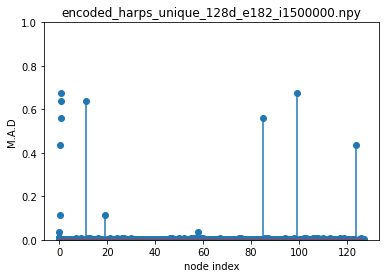

In [4]:
#--- Compute MADS measures for all latent dimensions
measure = 'median' #or 'mean'
mads_threshold = 0.02
if measure == 'median':
    mads = mad(codes.values) # Median Absolute Deviation
else:
    mads = codes.mad().values # Mean Absolute Deviation

#--- Locate informative/significant dimensions
significant_dimensions = np.nonzero(mads > mads_threshold )[0]
print('Informative dimensions:',significant_dimensions)

#--- Visualize
plt.figure()
plt.scatter(mads, mads)
plt.stem(mads,use_line_collection=True)
plt.xlabel('node index')
plt.ylabel('M.A.D')
plt.ylim([0,1])
plt.title(codes_file.split('harps_encoded')[-1])
plt.show();

In [5]:
#-------------------------------------------------------
# Load validation labels retrieved from the literature
#-------------------------------------------------------
labels = pd.read_csv('harps_metadata_and_labels.csv')

#--- If looking at the 'unique' subset, drop unnecessary rows
if "unique" in codes_file:
    labels.dropna(subset=['unique_subset'],inplace=True)

#--- and reindex the codes dataframe accordingly
codes.loc[:,'dp_id'] = labels['dp_id'].values
labels = labels.set_index('dp_id')
codes = codes.set_index('dp_id')
codes

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
dp_id,,,,,,,,,,,,,,,,,,,,,
ADP.2014-09-16T11:03:31.127,0.022619,0.008702,0.003565,-0.008090,-0.002158,0.019289,-0.004793,0.037820,0.009074,0.026378,...,0.011210,-0.024722,0.002371,-0.005110,-0.005057,0.001208,-0.156356,-0.005476,0.017024,-0.000261
ADP.2014-09-16T11:03:31.413,-0.003802,0.005300,-0.008371,-0.012530,-0.005186,0.005770,-0.006719,0.013567,0.002433,0.011316,...,0.002964,-0.014461,0.004969,0.011147,0.001793,0.013759,0.932076,-0.008795,-0.001797,-0.011051
ADP.2014-09-16T11:03:31.673,0.004768,0.012143,-0.004722,-0.004398,-0.002604,-0.002921,-0.006333,0.012474,0.010418,0.010521,...,0.003824,-0.022679,-0.003908,0.001823,0.007167,0.016491,0.070173,-0.003096,-0.000522,0.004261
ADP.2014-09-16T11:03:31.947,-0.004684,0.005786,-0.003726,-0.019478,-0.003583,-0.001197,-0.011058,0.004590,0.003639,-0.004696,...,0.000642,-0.008020,0.003465,0.013886,0.006208,0.022561,1.720115,-0.012932,-0.007507,0.003531
ADP.2014-09-16T11:03:32.443,-0.001797,0.002244,-0.007839,0.000821,-0.000663,0.009719,-0.000173,0.018266,0.008296,0.017897,...,0.017006,-0.025215,0.001325,-0.000884,0.000295,0.012396,0.465244,-0.007799,0.009903,-0.006600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADP.2018-07-26T01:02:10.221,0.040797,0.064959,-0.012087,0.001861,0.005347,-0.034136,-0.004237,0.060578,-0.039558,0.055059,...,0.002003,-0.048706,-0.054809,-0.013634,-0.008700,-0.010069,-0.008975,0.031549,0.024074,0.031486
ADP.2018-07-26T01:02:10.227,-0.010880,0.015008,-0.009106,-0.007652,0.002830,-0.001061,-0.006058,0.012178,-0.013519,0.019581,...,-0.013284,-0.019667,-0.000721,0.009685,0.000454,0.026580,0.607916,-0.014631,0.012532,-0.004010
ADP.2018-08-30T01:01:14.775,-0.008935,0.016145,-0.006867,-0.005676,-0.000139,0.000081,-0.004972,0.014937,-0.008298,0.019297,...,-0.010631,-0.020483,-0.000769,0.009950,0.001821,0.024775,0.643661,-0.018543,0.008949,-0.004891


In [6]:
(codes.values).shape

(7007, 128)

In [7]:
labels['median']

dp_id
ADP.2014-09-16T11:03:31.127      783.440247
ADP.2014-09-16T11:03:31.413      510.975769
ADP.2014-09-16T11:03:31.673     8315.300781
ADP.2014-09-16T11:03:31.947    10506.125977
ADP.2014-09-16T11:03:32.443      570.137878
                                   ...     
ADP.2018-07-26T01:02:10.221       17.998701
ADP.2018-07-26T01:02:10.227      916.055664
ADP.2018-08-30T01:01:14.775     1592.004883
ADP.2018-12-22T01:01:24.325    10309.150391
ADP.2019-01-26T01:13:31.797     5890.165039
Name: median, Length: 7007, dtype: float64

In [8]:
#--- Prevent noise-only signals from cluttering the visualization
to_remove = labels['median'] < 50
labels = labels[~to_remove]
codes = codes[~to_remove]

## 6.2 Mutual Information – with Known Physics

In [9]:
#--- A simple joint Probability Density Estimator
def pde2(d1,d2,nbins = 10, sigma=0):
    if sigma > 0:
        d1 = sigma_clip(d1,sigma=sigma)
        d2 = sigma_clip(d2,sigma=sigma)
        
    h,_,_ = np.histogram2d(d1,d2,bins=[nbins,nbins])
    h = h / np.sum(h)
    return h

#----------------------------------------------------------------------------
# Mutual information for joint histogram
# from https://matthew-brett.github.io/teaching/mutual_information.html
#----------------------------------------------------------------------------
def mutual_information(hgram): 
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))


# of labels: 4061


Text(0.5, 1.0, 'MI indicator for radvel')

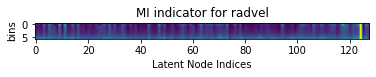

In [10]:
stellar_param = 'radvel' # Choose from ['radvel','Teff','Mass','E(B-V)','[M/H]','airmass','snr','vsini']
label = labels.loc[:,stellar_param].values


#-- Drop NaNs in labels
ind_mask = ~np.isnan(label)

#-- Ignore outlier (most probably erroneous) labels
label_ = sigma_clip(label,sigma=5,masked=True)
ind_mask = ind_mask & (~label_.mask)
label_ = label_.data[ind_mask]
print(f'# of labels: {len(label_)}')


#--- Compute the MI indicator with different binnings
nbinss = [5,10,20,40,80,160]
MI = np.zeros(nDimensions)
MIs = np.zeros([len(nbinss),nDimensions])

for b,nbins in enumerate(nbinss):
    for i in range(nDimensions):
        codes_ = codes.iloc[:,i].values
        codes_ = codes_[ind_mask]
        pqk = pde2(codes_,label_,nbins)
        MI[i] = mutual_information(pqk)
        MIs[b,i] = MI[i]

#--- Normalize MIs
MIs /= np.max(MIs,1)[:,np.newaxis]

plt.figure()
plt.imshow(MIs);
plt.xlabel('Latent Node Indices')
plt.ylabel('bins')
plt.yticks(None);
plt.title("MI indicator for "+stellar_param)

### 6.2.1 Analysis

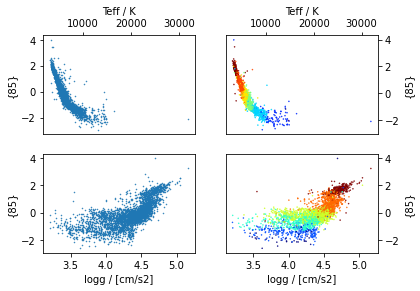

In [8]:
plt.figure()
lbl = 'Teff'
the_dim = 85


plt.subplot(221)
plt.scatter(labels.loc[:,lbl],codes.iloc[:,the_dim],
            marker=".",s=1)
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.gca().set_xlabel(f'{lbl} / K')
plt.gca().set_ylabel('{%d}'%the_dim)


plt.subplot(222)
plt.scatter(labels.loc[:,lbl],codes.iloc[:,the_dim],
            c=labels["spec_type_no"],cmap="jet",marker=".",s=1)
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.gca().set_xlabel(f'{lbl} / K')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.gca().set_ylabel('{%d}'%the_dim)

lbl = 'logg'
the_dim = 85


plt.subplot(223)
plt.scatter(labels.loc[:,lbl],codes.iloc[:,the_dim],
            marker=".",s=1)
plt.gca().set_xlabel(f'{lbl} / [cm/s2]')
plt.gca().set_ylabel('{%d}'%the_dim)


plt.subplot(224)
plt.scatter(labels.loc[:,lbl],codes.iloc[:,the_dim],
            c=labels["spec_type_no"],cmap="jet",marker=".",s=1)
plt.gca().set_xlabel(f'{lbl} / [cm/s2]')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.gca().set_ylabel('{%d}'%the_dim)

plt.show()


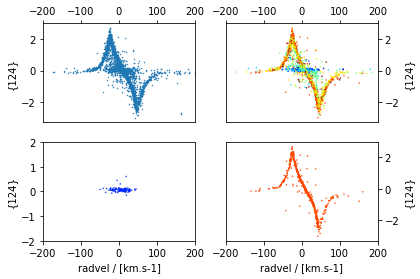

In [9]:
plt.figure()
lbl = 'radvel'
the_dim = 124


plt.subplot(221)
plt.scatter(labels.loc[:,lbl],codes.iloc[:,the_dim],
            marker=".",s=1)
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.gca().set_ylabel('{%d}'%the_dim)
plt.gca().set_xlim([-200,200])


plt.subplot(222)
plt.scatter(labels.loc[:,lbl],codes.iloc[:,the_dim],
            c=labels["spec_type_no"],cmap="jet",marker=".",s=1,vmin=0,vmax=6)
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.gca().set_ylabel('{%d}'%the_dim)
plt.gca().set_xlim([-200,200])


plt.subplot(223)
ind = labels.loc[labels["spec_type_no"] == 1].index
plt.scatter(labels.loc[ind][lbl],codes.loc[ind,the_dim],
            c=labels.loc[ind]["spec_type_no"],cmap="jet",marker=".",s=1,vmin=0,vmax=6)
plt.gca().set_xlabel(f'{lbl} / [km.s-1]')
plt.gca().set_ylabel('{%d}'%the_dim)
plt.gca().set_ylim([-2,2])
plt.gca().set_xlim([-200,200])

plt.subplot(224)
ind = labels.loc[labels["spec_type_no"] == 5].index
plt.scatter(labels.loc[ind][lbl],codes.loc[ind,the_dim],
            c=labels.loc[ind]["spec_type_no"],cmap="jet",marker=".",s=1,vmin=0,vmax=6)
plt.gca().set_xlabel(f'{lbl} / [km.s-1]')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.gca().set_ylabel('{%d}'%the_dim)
plt.gca().set_xlim([-200,200])

plt.show()

#### Dependence of logg and Teff across the dataset

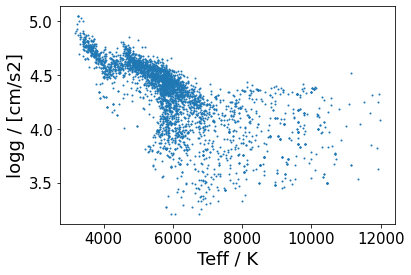

In [10]:
plt.figure()

plt.scatter(labels.loc[:,'Teff'],labels.loc[:,'logg'],s=1)
plt.gca().set_xlabel(f'Teff / K', fontsize=18)
plt.gca().set_ylabel(f'logg / [cm/s2]', fontsize=18)
plt.gca().tick_params(axis=u'both', which=u'both',labelsize=15)


## New approach

In [12]:
from sklearn.feature_selection import mutual_info_regression
stellar_params = ['radvel','Teff','Mass','[M/H]','airmass','snr','vsini']
MIs = np.zeros([len(stellar_params), \
                    len(significant_dimensions)])
codes_sig = codes.iloc[:, significant_dimensions]
                
for li,stellar_param in enumerate(stellar_params):        
    label = labels.loc[:,stellar_param].values
    
    ind_mask = ~np.isnan(label)
    label_ = sigma_clip(label,sigma=5,masked=True)

    ind_mask = ind_mask & (~label_.mask)
    label_ = label_.data[ind_mask]      
    for i in range(0,codes_sig.shape[1]):                          
        codes_ = codes_sig.iloc[:,i].values
        codes_ = codes_[ind_mask]
        
        MIs[li,i] = mutual_info_regression(codes_.reshape(-1, 1),label_)

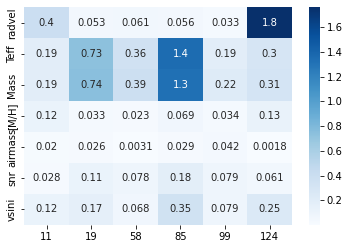

In [13]:
import seaborn as sns

plt.figure()
ax = sns.heatmap(MIs, annot=True, cmap='Blues')
ax.yaxis.set_ticklabels(stellar_params)
ax.xaxis.set_ticklabels(significant_dimensions)
plt.gcf().set_facecolor('white')